In [12]:
import scipy.io
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

In [13]:
data = scipy.io.loadmat('cardio.mat')

# Visualize data

In [14]:
df = pd.DataFrame(data['X'])

In [15]:
df[21] = data['y']

In [16]:
viz_cols = [10,11,12,13,14,15]

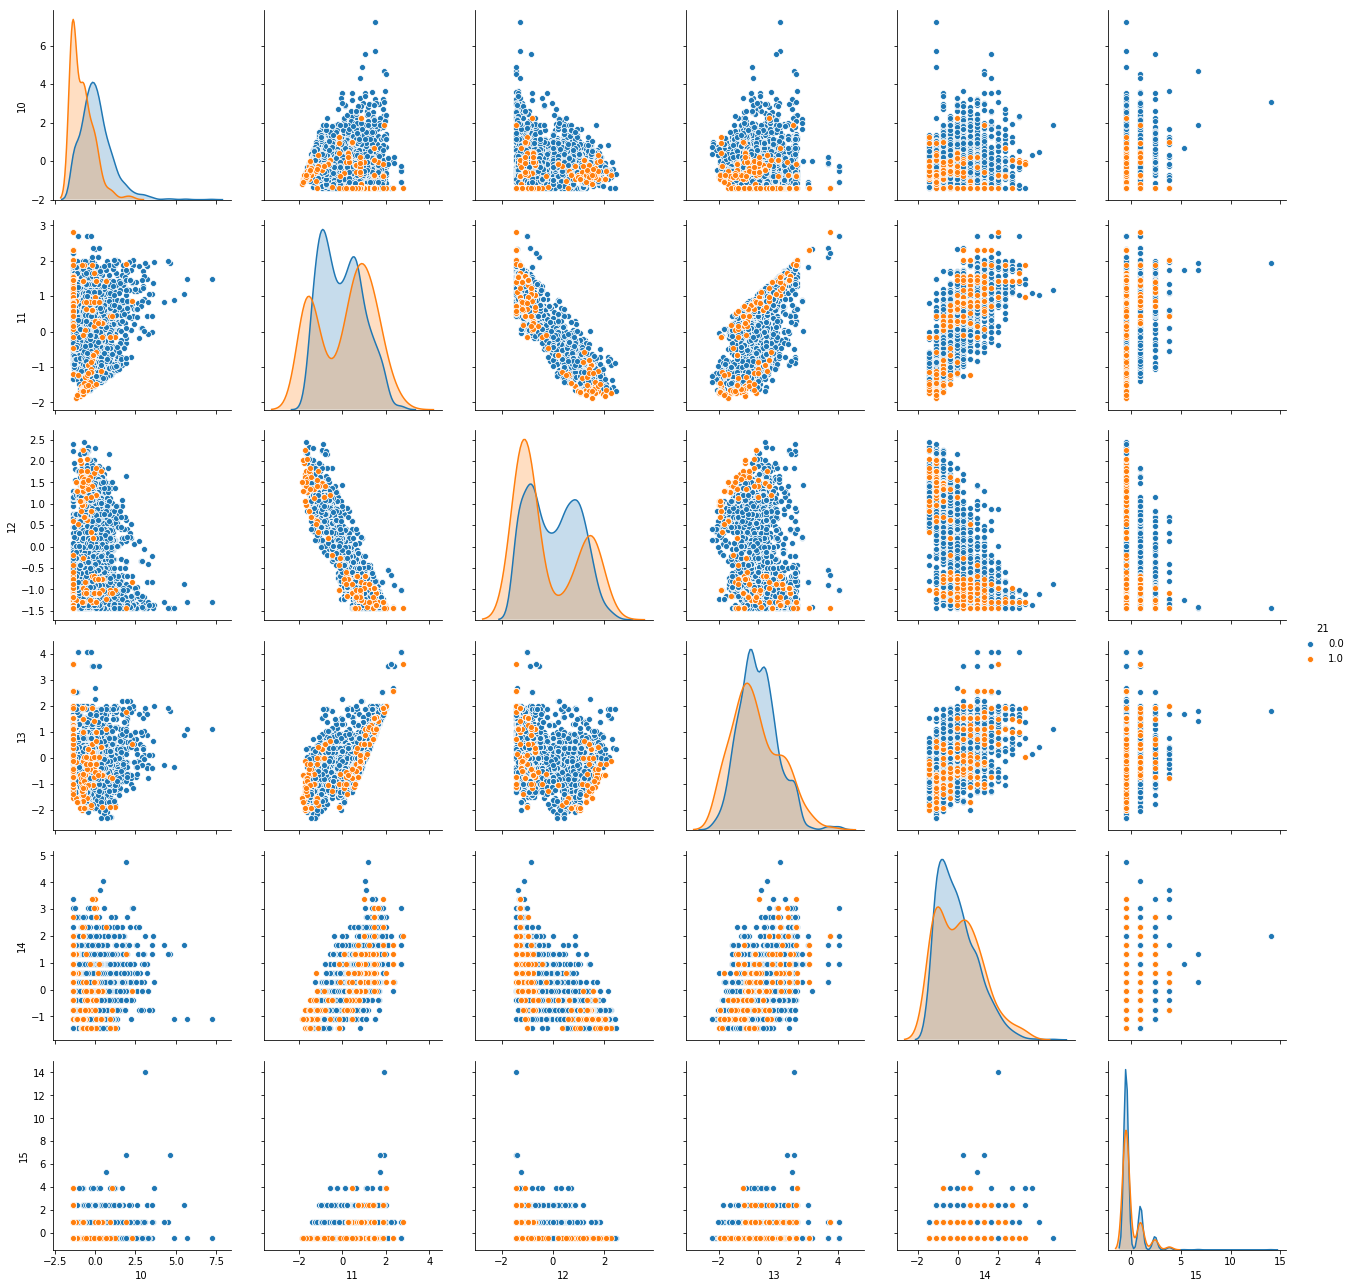

In [17]:
pp = sns.pairplot(df, hue=21, height=3,
                 x_vars=viz_cols, y_vars=viz_cols)

# Train model

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data['X'], data['y'], test_size=0.2, random_state=59)

In [181]:
classifiers = dict((covar_type, GaussianMixture(n_components=2,
                    covariance_type=covar_type, init_params='kmeans', max_iter=10000))
                   for covar_type in ['spherical', 'diag', 'tied', 'full'])

In [187]:
classifier = classifiers['full']

In [188]:
classifier.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [189]:
y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

In [190]:
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100

In [191]:
print('Accuracy: ', test_accuracy)

Accuracy:  84.74114441416893
